<h1> IMDB Review using NLP </h1>

In [0]:
from google.colab import files
from IPython.display import Image

In [0]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

tf.enable_eager_execution()

#Download dataset
!pip install -q tensorflow-datasets

#We use only imdb here
import tensorflow_datasets as tfds
imdb, info=tfds.load("imdb_reviews",with_info=True, as_supervised=True)


1.14.0
     |████████████████████████████████| 686kB 4.8MB/s 


W0718 07:59:11.412856 140601446541184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
train_data, test_data=imdb['train'], imdb['test']

training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

""""df = pd.DataFrame({"A": [1, 2], "B": [3.0, 4.5]})
    df.to_numpy()
    array([[1. , 3. ],
          [2. , 4.5]])"""

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
print("Training sentences : ",training_sentences[:1])
print("Training labels : ",training_labels[:3])

training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

print("Training labels final: ",training_labels_final[:3])



  

Training sentences :  ["b'This was a wonderfully clever and entertaining movie that I shall never tire of watching many, many times. The casting was magnificent in matching up the young with the older characters. There are those of us out here who really do appreciate good actors and an intelligent story format. As for Judi Dench, she is beautiful and a gift to any kind of production in which she stars. I always make a point to see Judi Dench in all her performances. She is a superb actress and a pleasure to watch as each transformation of her character comes to life. I can only be grateful when I see such an outstanding picture for most of the motion pictures made more recently lack good characters, good scripts and good acting. The movie public needs heroes, not deviant manikins, who lack ingenuity and talent. How wonderful to see old favorites like Leslie Caron, Olympia Dukakis and Cleo Laine. I would like to see this movie win the awards it deserves. Thank you again for a tremendou

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000,oov_token="<OOV")

#Fit model on training data
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print("Word index : ",word_index)

sequences = tokenizer.texts_to_sequences(training_sentences)
padded=pad_sequences(sequences,maxlen=120,truncating='post')
print("Training sequence padded : ",padded[:20],)

#Based on word index based on training set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=120)
print("Testing sequence padded: ",testing_padded[:20])


Word index :  {'<OOV': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, "'s": 21, 'on': 22, 'you': 23, 'not': 24, 'are': 25, 'his': 26, 'he': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'by': 33, 'they': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'her': 40, "'t": 41, 'or': 42, 'just': 43, 'there': 44, 'about': 45, 'out': 46, "'": 47, 'has': 48, 'if': 49, 'some': 50, 'what': 51, 'good': 52, 'more': 53, 'very': 54, 'when': 55, 'she': 56, 'up': 57, 'can': 58, 'b': 59, 'time': 60, 'no': 61, 'even': 62, 'my': 63, 'would': 64, 'which': 65, 'story': 66, 'only': 67, 'really': 68, 'see': 69, 'their': 70, 'had': 71, 'were': 72, 'me': 73, 'well': 74, 'we': 75, 'than': 76, 'much': 77, 'been': 78, 'get': 79, 'bad': 80, 'will': 81, 'people': 82, 'do': 83, 'also': 84, 'other': 85, 'into': 86, 'because': 87, 'great': 88, 'fi

In [0]:
vocab_size=10000
embedding_dim=16
#Each review is only 120 words long
max_length=120

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,
                              embedding_dim,
                              input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(padded,training_labels_final,epochs=10,validation_data=(testing_padded, testing_labels_final))

W0718 08:02:55.254184 140601446541184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 215us/sample - loss: 0.5151 - acc: 0.7192 - val_loss: 0.3486 - val_acc: 0.8487
Epoch 2/10
25000/25000 [==============================] - 5s 185us/sample - loss: 0.2394 - acc: 0.9081 - val_loss: 0.3704 - val_acc: 0.8397
Epoch 3/10
25000/25000 [==============================] - 5s 186us/sample - loss: 0.0874 - acc: 0.9788 - val_loss: 0.4511 - val_acc: 0.8271
Epoch 4/10
25000/25000 [==============================] - 5s 186us/sample - loss: 0.0213 - acc: 0.9973 - val_loss: 0.5296 - val_acc: 0.8244
Epoch 5/10
25000/25000 [==============================] - 5s 186us/sample - loss: 0.0056 - acc: 0.9996 - val_loss: 0.5907 - val_acc: 0.8246
Epoch 6/10
25000/25000 [==============================] - 5s 187us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6402 - val_acc: 0.8254
Epoch 7/10
25000/25000 [==============================] - 5s 189us/sample - loss: 8.3939e-04 - acc: 1.0000 - v

In [0]:
e=model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 
# shape: (vocab_size, embedding_dim)
#10000 words and 16 dimension space

(10000, 16)


In [0]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
"""  {1: '<OOV',
      2: 'the',
      3: 'and',                """


"  {1: '<OOV',\n      2: 'the',\n      3: 'and',                "

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for i in range(1, vocab_size):
  word = reverse_word_index[i]
  embeddings = weights[i]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

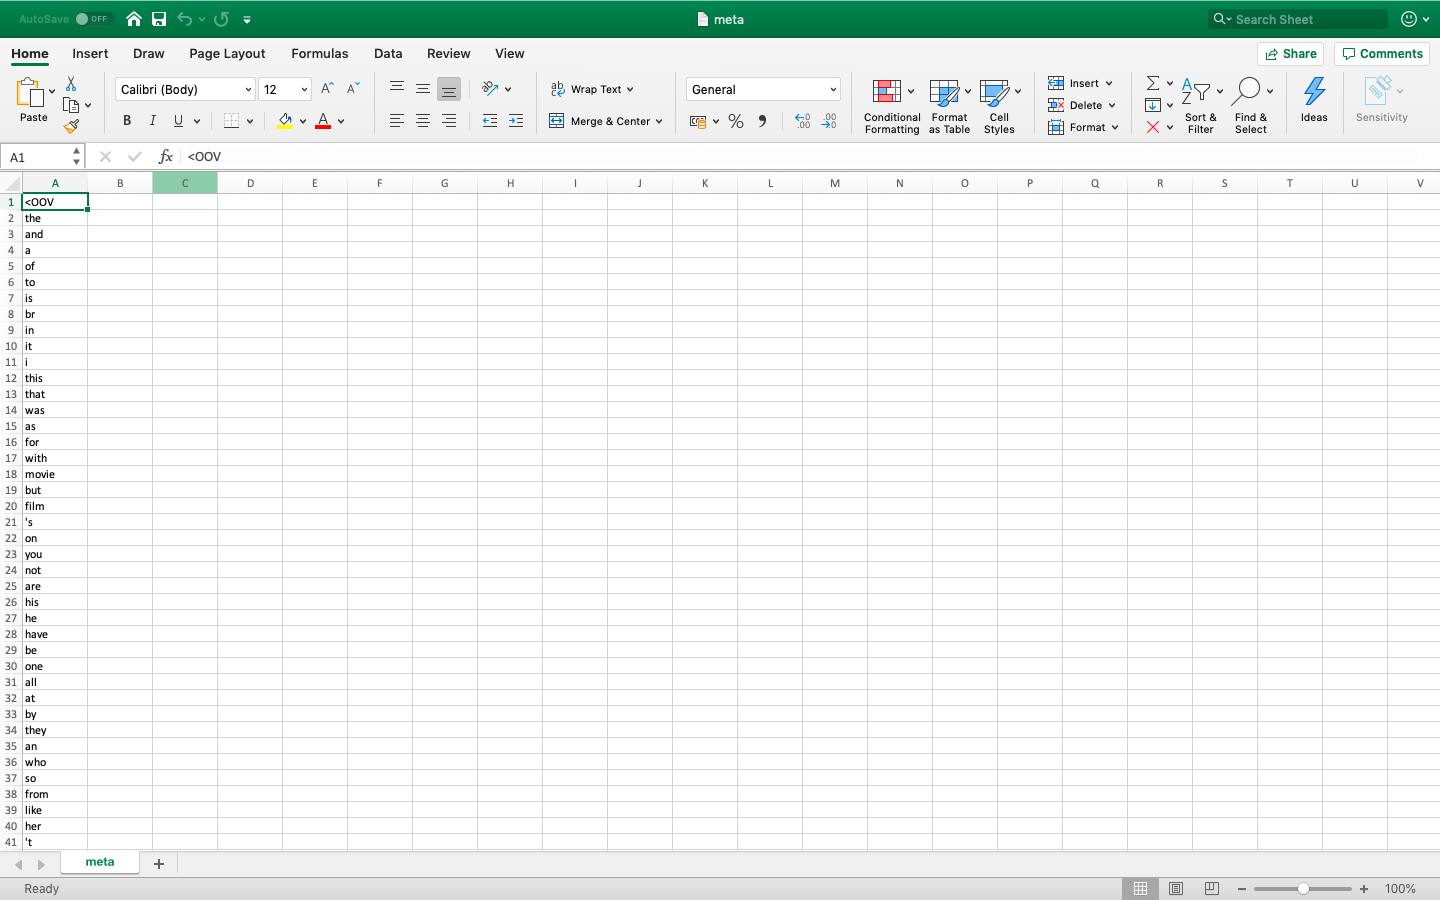

In [0]:
Image('meta.png',height=400,width=600)

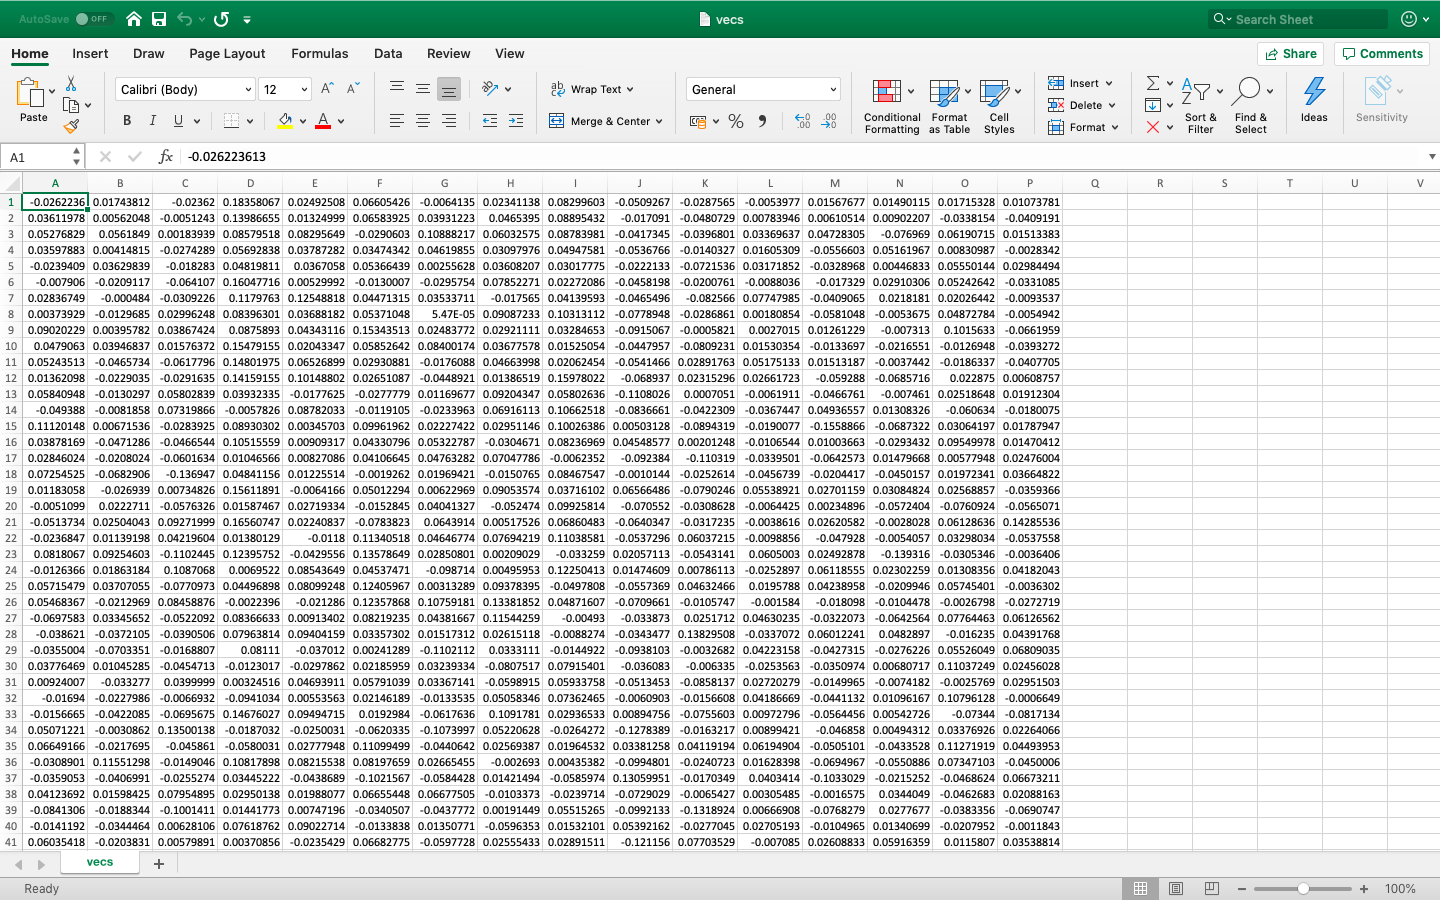

In [0]:
Image('vecs.png',height=400,width=600)

In [0]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1429], [968], [4], [1537], [1537], [4739], [], [790], [2014], [11], [2922], [2189], [], [790], [2014], [11], [579], [], [11], [579], [], [4], [1783], [4], [4508], [11], [2922], [1277], [], [], [2014], [1005], [2922], [968], [579], [790], []]


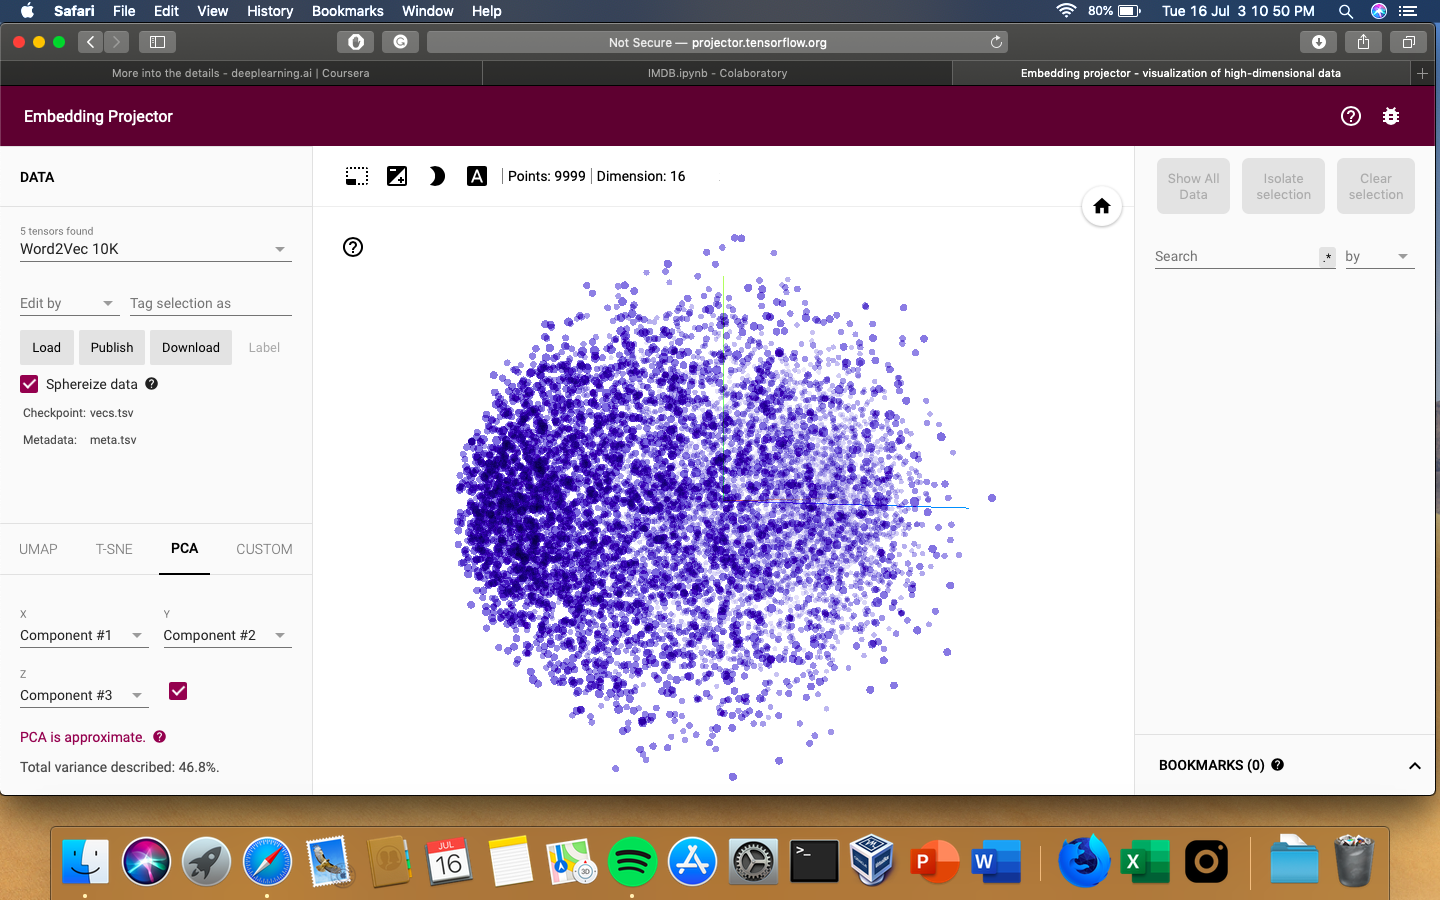

In [0]:
Image('dia.png',height=400,width=600)